# [LIST]
## 1. 데이터 수집 및 전처리
### 1-1. 데이터 수집,불러오기
### 1-2. 데이터 파악, 전처리
### 1-3. 통계적 요약과 변수 간 관계
### 1-4. 파생변수 생성과 데이터 정제

## 1. 데이터 수집 및 전처리
### 1-1. 데이터 수집,불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
X = pd.read_csv("/content/drive/MyDrive/Adam/신용등급_분류/train.csv")
X.head(5)

<ipython-input-568-f8903c5124a4>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv("/content/drive/MyDrive/Adam/신용등급_분류/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### 1-2. 데이터 파악,전처리

### 데이터 컬럼과 자료형 확인

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
print('전체 데이터 수 : ', len(X) )
print('컬럼 수 : ', len(X.columns))

전체 데이터 수 :  100000
컬럼 수 :  28


### 전처리 전 시각화를 통한 데이터 파악

In [ ]:
num_columns = [idx for idx, type_ in zip(X.dtypes.index, X.dtypes) if type_ in ('int64','float64')]
cat_columns = [c for c in X.columns if c not in num_columns]
print(f'Numeric columns : {num_columns} \n Categorical columns : {cat_columns}')

Numeric columns : ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month'] 
 Categorical columns : ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


- 숫자형 컬럼 히스토그램

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>, <Axes: >]],
      dtype=object)

<Figure size 800x800 with 0 Axes>

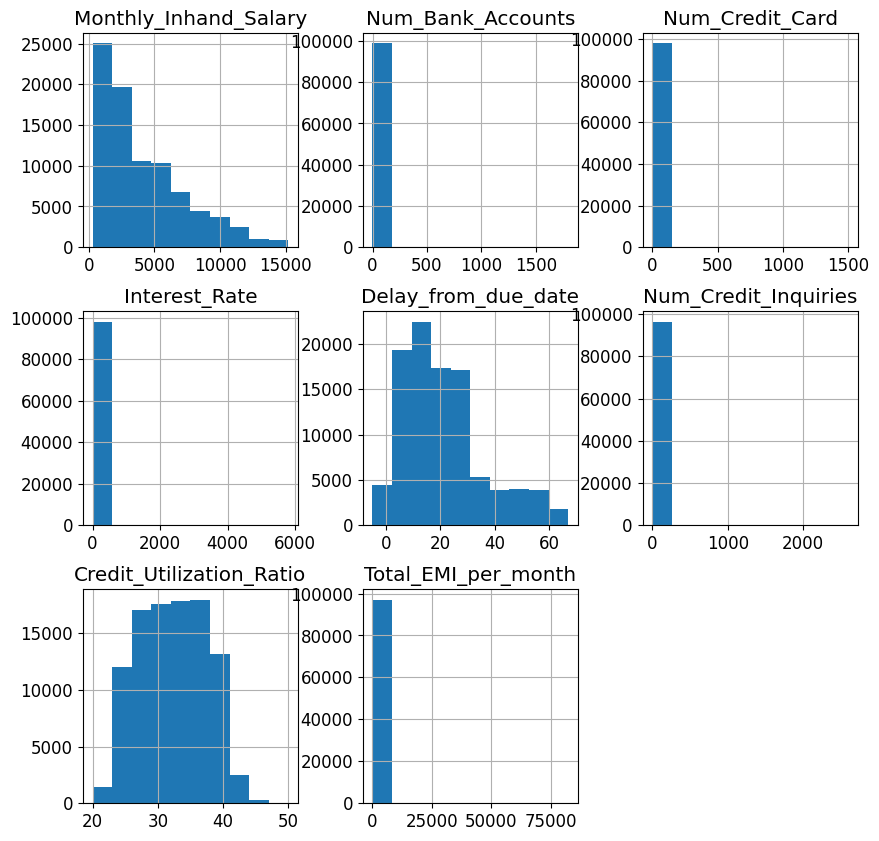

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
X[num_columns].hist(figsize=(10,10))

In [ ]:
X['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [ ]:
X['SSN'].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [ ]:
X['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
X['Annual_Income'].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [ ]:
X['Num_of_Loan'].value_counts()

3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

In [ ]:
X['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [ ]:
X['Num_of_Delayed_Payment'].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [ ]:
X['Changed_Credit_Limit'].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [ ]:
X['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
X['Outstanding_Debt'].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [ ]:
X['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [ ]:
X['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
X['Amount_invested_monthly'].value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [ ]:
X['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
X['Monthly_Balance'].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [ ]:
del X['Name']
del X['SSN']
#del X['Changed_Credit_Limit']

### 결측치 확인 및 처리

In [ ]:
X.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

- 숫자형 데이터 결측값 처리

In [ ]:
print(X['Monthly_Inhand_Salary'].isnull().sum())
print(X['Num_Credit_Inquiries'].isnull().sum())

15002
1965


In [ ]:
X[num_columns].describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
X['Monthly_Inhand_Salary'] = X['Monthly_Inhand_Salary'].fillna(X['Monthly_Inhand_Salary'].median())
X['Num_Credit_Inquiries'] = X['Num_Credit_Inquiries'].fillna(X['Num_Credit_Inquiries'].median())
X[num_columns].describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4029.084964,17.091280,22.47443,72.466040,21.068780,27.326780,32.285173,1403.118217
std,2961.363540,117.404834,129.05741,466.422621,14.860104,191.293766,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1792.084167,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5371.525000,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


- 범주형 데이터 결측값 처리

In [ ]:
# 결측치를 'unknown'으로 대체
X['Type_of_Loan'] = X['Type_of_Loan'].fillna('unknown')
X['Credit_History_Age'] = X['Credit_History_Age'].fillna('unknown')

- 숫자값인데 범주형인 데이터 결측값 처리

In [ ]:
#'_'특수문자 제거(모든 특수 문자 제거 : pat = r'[^\w]')
X['Num_of_Delayed_Payment'] = X['Num_of_Delayed_Payment'].str.replace(pat=r'_',repl=r'',regex=True)
#결측값을 중위값으로 대체
X['Num_of_Delayed_Payment'] = X['Num_of_Delayed_Payment'].fillna(X['Num_of_Delayed_Payment'].median())
#문자형 값들을 정수형으로 변환
X['Num_of_Delayed_Payment'] = X['Num_of_Delayed_Payment'].astype(int) 
X['Num_of_Delayed_Payment']

0         7
1        14
2         7
3         4
4        14
         ..
99995     7
99996     7
99997     6
99998    14
99999     6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: int64

In [ ]:
X['Amount_invested_monthly'] = X['Amount_invested_monthly'].str.replace(pat=r'_',repl=r'',regex=True)
X['Amount_invested_monthly'] = X['Amount_invested_monthly'].astype(float) 
X['Amount_invested_monthly'] = X['Amount_invested_monthly'].fillna(X['Amount_invested_monthly'].median())

X['Monthly_Balance'] = X['Monthly_Balance'].str.replace(pat=r'_',repl=r'',regex=True)
X['Monthly_Balance'] = X['Monthly_Balance'].astype(float) 
X['Monthly_Balance'] = X['Monthly_Balance'].fillna(X['Monthly_Balance'].median())

In [ ]:
X.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### 이상치 확인 및 처리

- 수치형 변수 이상치 처리

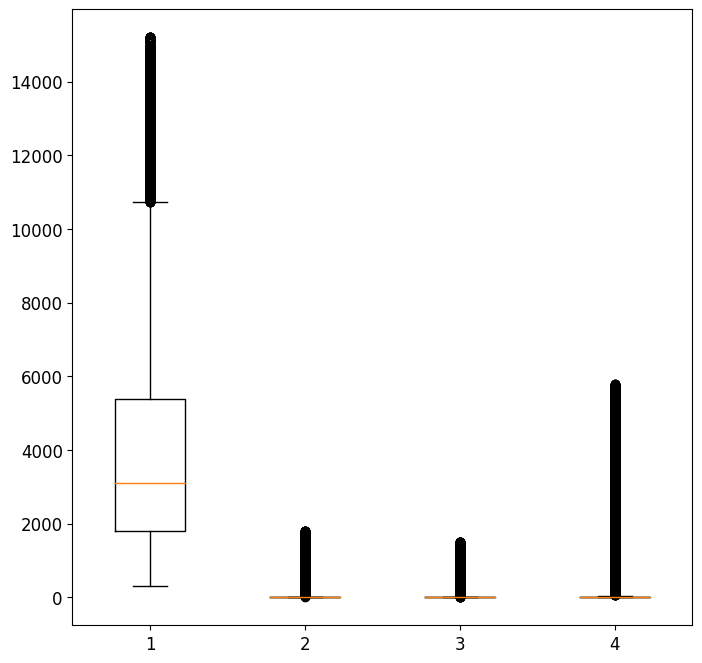

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
ax.boxplot([X['Monthly_Inhand_Salary'],X['Num_Bank_Accounts'],X['Num_Credit_Card'],X['Interest_Rate']])
plt.show()

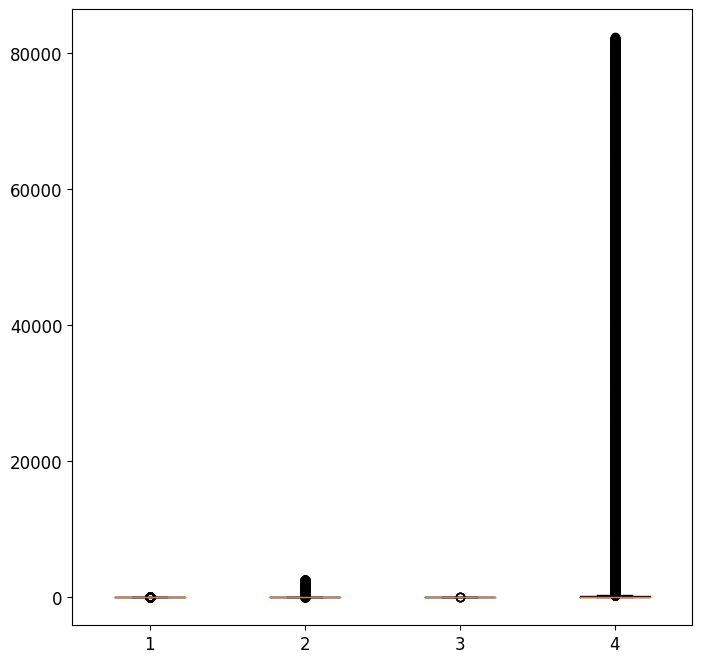

In [ ]:
fig,ax = plt.subplots()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
ax.boxplot([X['Delay_from_due_date'],X['Num_Credit_Inquiries'],X['Credit_Utilization_Ratio'],X['Total_EMI_per_month']])
plt.show()

In [ ]:
def get_outlier(df=None, column = None, weight=1.5):
    quantile_25 = np.percentile(df[column].values,25)
    quantile_75 = np.percentile(df[column].values,75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight 
	
    lowest_val = quantile_25 - iqr_weight 
    highest_val = quantile_75 + iqr_weight 
	
    outlier_idx = df[column][ (df[column] < lowest_val) | (df[column] > highest_val) ].index
    return outlier_idx

In [ ]:
# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=X, column='Monthly_Inhand_Salary', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Num_Bank_Accounts', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Num_Credit_Card', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Interest_Rate', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Delay_from_due_date', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Num_Credit_Inquiries', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Credit_Utilization_Ratio', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=X, column='Total_EMI_per_month', weight=1.5)
X.drop(outlier_idx, axis=0, inplace=True)

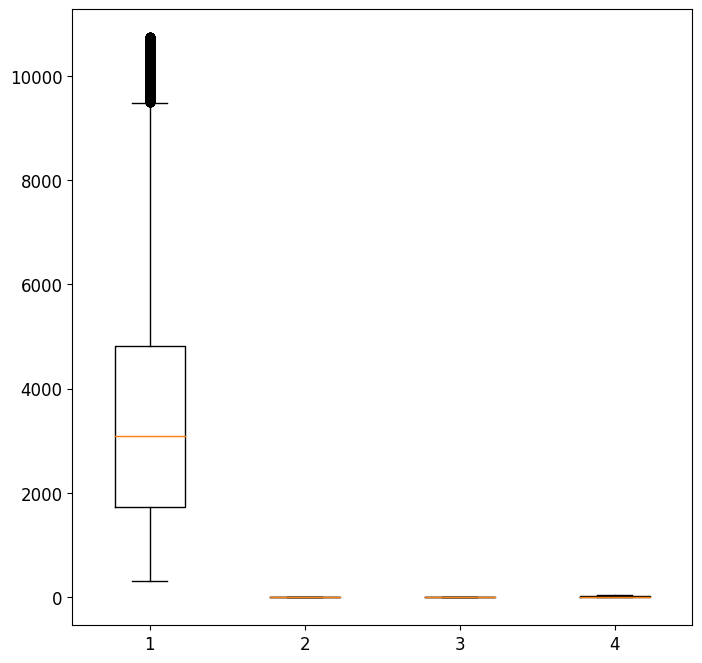

In [ ]:
fig,ax = plt.subplots()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
ax.boxplot([X['Monthly_Inhand_Salary'],X['Num_Bank_Accounts'],X['Num_Credit_Card'],X['Interest_Rate']])
plt.show()

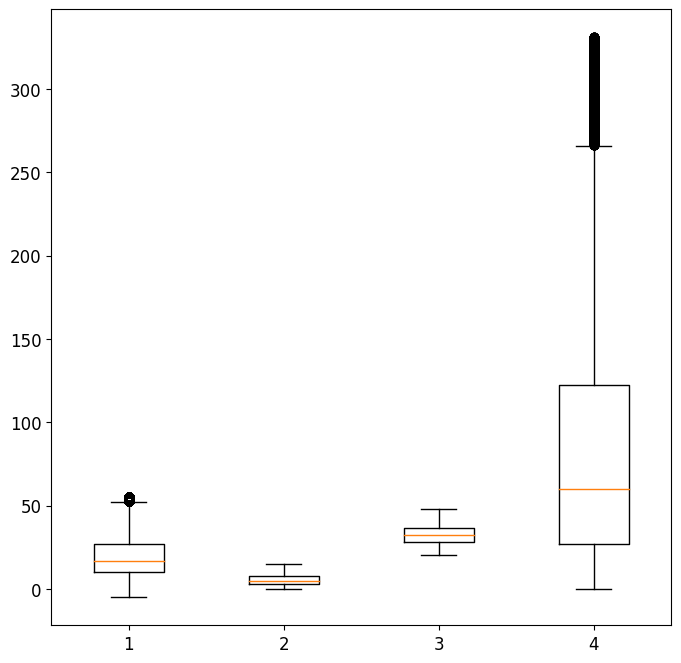

In [ ]:
fig,ax = plt.subplots()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 12
ax.boxplot([X['Delay_from_due_date'],X['Num_Credit_Inquiries'],X['Credit_Utilization_Ratio'],X['Total_EMI_per_month']])
plt.show()

### 범주형 변수의 처리

In [ ]:
X['ID'] = X.ID.apply(lambda x: int(x, 16)) #16진수 -> 10진수 정수형으로 변환
X['Customer_ID'] = X.Customer_ID.apply(lambda x : int(x[4:],16)) #4번째 문자열부터 16진수 문자열을 정수형으로

In [ ]:
X['Month'] = pd.to_datetime(X.Month, format = '%B').dt.month

In [ ]:
#Age칼럼의 '_'특수문자를 제거
X['Age'] = X['Age'].str.replace(pat=r'_',repl=r'',regex=True)
#특수문자 제거후 정수형으로 변환
X['Age'] = X['Age'].astype(int)

In [ ]:
#'_'특수문자 제거
X['Annual_Income'] = X['Annual_Income'].str.replace(pat=r'_',repl=r'',regex=True)
X['Annual_Income'] = X['Annual_Income'].astype(float)

X['Num_of_Loan'] = X['Num_of_Loan'].str.replace(pat=r'_',repl=r'',regex=True)
X['Num_of_Loan'] = X['Num_of_Loan'].astype(int)

X['Outstanding_Debt'] = X['Outstanding_Debt'].str.replace(pat=r'_',repl=r'0',regex=True)
X['Outstanding_Debt'] =X['Outstanding_Debt'].astype(float)

X['Changed_Credit_Limit'] = X['Changed_Credit_Limit'].str.replace(pat=r'_',repl=r'0',regex=True)
X['Changed_Credit_Limit'] = X['Changed_Credit_Limit'].astype(float)

- Label Encoing

In [ ]:
num_columns = list(X.select_dtypes(['float64','int64']).columns)
cat_columns = list(X.select_dtypes(['object']).columns)
print(f'Numeric columns : {num_columns} \n Categorical columns : {cat_columns}')

Numeric columns : ['ID', 'Customer_ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] 
 Categorical columns : ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [ ]:
from sklearn.preprocessing import LabelEncoder as le
Occupation_le = le()
Type_of_Loan_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [ ]:
X['Occupation'] = Occupation_le.fit_transform(X['Occupation'])
X['Type_of_Loan'] = Type_of_Loan_le.fit_transform(X['Type_of_Loan'])
X['Credit_Mix'] = Credit_Mix_le.fit_transform(X['Credit_Mix'])
X['Credit_History_Age'] = Credit_History_Age_le.fit_transform(X['Credit_History_Age'])
X['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(X['Payment_of_Min_Amount'])
X['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(X['Payment_Behaviour'])
X['Credit_Score'] = Credit_Score_le.fit_transform(X['Credit_Score'])

## 3. 통계적 요약과 변수 간 관계

### 3-1. 데이터의 통계적 성질

In [ ]:
X[num_columns].describe()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,78577.000000,78577.000000,78577.000000,78577.000000,7.857700e+04,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,78577.000000,7.857700e+04
mean,80751.101747,25908.247668,4.465442,113.405742,1.697450e+05,3595.219722,5.323072,5.478690,14.243799,2.932830,19.677768,29.410540,10.135135,5.610599,1373.889859,32.184861,83.966892,595.758882,-2.969486e+22
std,43212.538236,14336.710576,2.292677,698.983459,1.426289e+06,2377.335928,2.553855,2.031832,8.561554,63.356592,12.868045,216.319185,6.754597,3.688576,1117.349135,5.064060,76.894593,1996.092166,3.146034e+24
min,5634.000000,1006.000000,1.000000,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.172942,0.000000,0.000000,-3.333333e+26
25%,43339.000000,13615.000000,2.000000,24.000000,1.904044e+04,1721.569167,3.000000,4.000000,7.000000,1.000000,10.000000,9.000000,5.070000,3.000000,552.500000,27.971484,26.854020,73.883676,2.723158e+02
50%,80794.000000,25640.000000,4.000000,33.000000,3.502349e+04,3093.745000,5.000000,5.000000,13.000000,3.000000,17.000000,14.000000,9.290000,5.000000,1132.540000,32.189707,59.957811,135.030453,3.364493e+02
75%,118093.000000,38307.000000,6.000000,42.000000,6.607492e+04,4827.682500,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,14.530000,8.000000,1817.000000,36.410399,122.634520,231.749480,4.487940e+02
max,155629.000000,50999.000000,8.000000,8698.000000,2.419806e+07,10739.366667,11.000000,11.000000,34.000000,1496.000000,55.000000,4397.000000,36.970000,15.000000,4998.070000,48.247003,331.073500,10000.000000,1.525368e+03


### 3-2. 변수 간 관계

- heatmap

<Axes: >

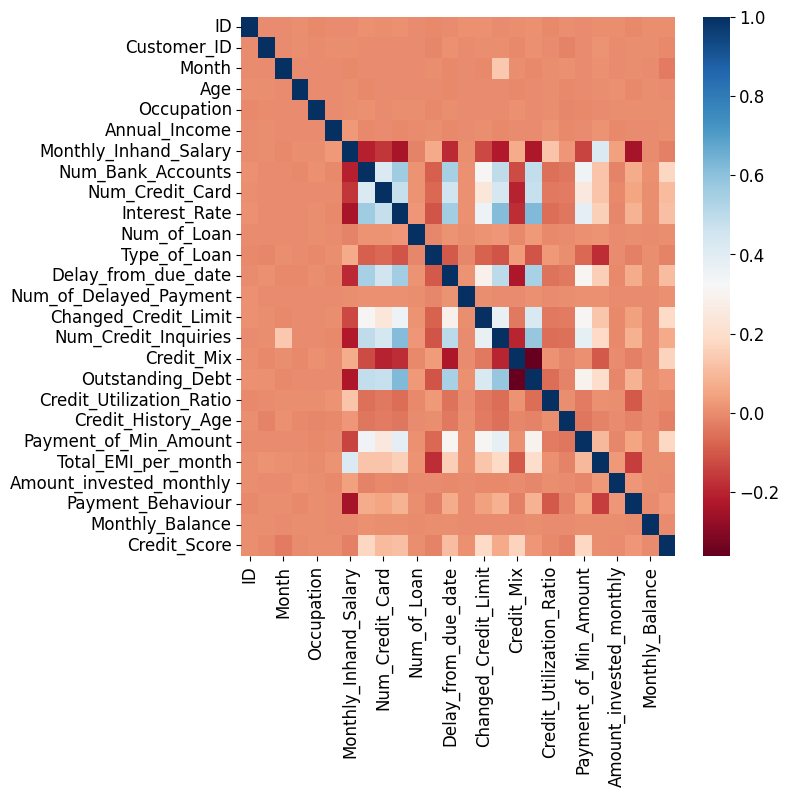

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,7))
corr = X.corr()
#cmap = ‘RdBu’ ⇒ 양의 상관관계가 높을수록 색깔이 진한 파란색, 음의 상관관계가 높을수록 색이 진한 빨간색
sns.heatmap(corr,cmap='RdBu')

In [ ]:
X.corr()

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,1.000000,0.000852,-0.000590,0.002921,-0.008612,0.000705,0.000081,0.008535,0.002237,0.007453,...,0.003655,0.007546,-0.005613,0.003790,-0.002937,0.003569,0.004455,-0.004868,0.001523,0.003388
Customer_ID,0.000852,1.000000,-0.000696,0.003435,0.000368,0.002056,0.002391,0.000446,-0.003318,-0.002019,...,-0.005902,0.007346,-0.003405,-0.015853,0.000834,0.014201,-0.003929,0.003875,0.001287,-0.007168
Month,-0.000590,-0.000696,1.000000,-0.003676,-0.001363,-0.000357,-0.006101,-0.003047,-0.001888,-0.004154,...,0.003760,-0.004804,0.004146,0.009060,-0.001083,0.010512,0.000894,0.002191,-0.000436,-0.035760
Age,0.002921,0.003435,-0.003676,1.000000,-0.003413,-0.003853,0.005145,-0.007260,-0.001951,-0.003835,...,-0.004861,-0.000249,0.001383,-0.005075,-0.003773,0.003409,0.006467,-0.007091,0.001092,-0.001947
Occupation,-0.008612,0.000368,-0.001363,-0.003413,1.000000,-0.003601,0.004971,0.010075,-0.000359,0.001972,...,0.006627,0.000458,0.002674,-0.012253,-0.008674,-0.001641,0.006286,0.002766,0.005434,0.004150
Annual_Income,0.000705,0.002056,-0.000357,-0.003853,-0.003601,1.000000,0.023538,-0.006905,-0.000690,-0.006025,...,-0.003830,-0.001279,0.012084,-0.005692,-0.001885,0.014841,-0.007080,-0.003770,0.000749,0.002699
Monthly_Inhand_Salary,0.000081,0.002391,-0.006101,0.005145,0.004971,0.023538,1.000000,-0.206231,-0.167902,-0.239541,...,0.065312,-0.230503,0.126257,0.020003,-0.138367,0.423981,0.043542,-0.248664,-0.003761,-0.024084
Num_Bank_Accounts,0.008535,0.000446,-0.003047,-0.007260,0.010075,-0.006905,-0.206231,1.000000,0.421047,0.563682,...,-0.125854,0.488753,-0.052629,-0.043204,0.348472,0.124538,-0.015905,0.070003,0.008586,0.175219
Num_Credit_Card,0.002237,-0.003318,-0.001888,-0.001951,-0.000359,-0.000690,-0.167902,0.421047,1.000000,0.480544,...,-0.203143,0.474341,-0.040675,-0.032447,0.245591,0.125828,-0.008329,0.052015,0.002887,0.104994
Interest_Rate,0.007453,-0.002019,-0.004154,-0.003835,0.001972,-0.006025,-0.239541,0.563682,0.480544,1.000000,...,-0.181737,0.621336,-0.057907,-0.042758,0.383705,0.157462,-0.013395,0.083418,0.005309,0.115732


## 4.데이터 정제

### 4-1. 최종 데이터 선정 및 시각화

In [ ]:
X

,ID,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23,12,19114.12,1824.843333,3,4,3,...,3,809.98,26.822620,180,1,49.574949,80.415295,3,312.494089,0
1,5635,3392,2,23,12,19114.12,3093.745000,3,4,3,...,1,809.98,31.944960,404,1,49.574949,118.280222,4,284.629162,0
2,5636,3392,3,-500,12,19114.12,3093.745000,3,4,3,...,1,809.98,28.609352,184,1,49.574949,81.699521,5,331.209863,0
3,5637,3392,4,23,12,19114.12,3093.745000,3,4,3,...,1,809.98,31.377862,185,1,49.574949,199.458074,6,223.451310,0
4,5638,3392,5,23,12,19114.12,1824.843333,3,4,3,...,1,809.98,24.797347,186,1,49.574949,41.420153,2,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,155624,37932,3,25,9,39628.99,3359.415833,4,6,7,...,3,502.38,39.323569,306,1,35.104023,140.581403,2,336.449266,1
99995,155625,37932,4,25,9,39628.99,3359.415833,4,6,7,...,3,502.38,34.663572,307,1,35.104023,60.971333,1,336.449266,1
99996,155626,37932,5,25,9,39628.99,3359.415833,4,6,7,...,3,502.38,40.565631,308,1,35.104023,54.185950,2,336.449266,1
99998,155628,37932,7,25,9,39628.99,3359.415833,4,6,7,...,1,502.38,33.638208,310,1,35.104023,251.672582,4,336.449266,2


In [ ]:
X.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### 4-2. 데이터 저장

In [ ]:
X.to_csv('preprocessing_data.csv',index=False)